MODEL PERFORMANCE:

🔹 Logistic Regression
   Accuracy  : 0.9955
   Precision : 0.9429
   Recall    : 0.8250
   F1 Score  : 0.8800
   ROC AUC   : 0.9788

🔹 Random Forest
   Accuracy  : 0.9980
   Precision : 1.0000
   Recall    : 0.9000
   F1 Score  : 0.9474
   ROC AUC   : 0.9701

🔹 Decision Tree
   Accuracy  : 0.9945
   Precision : 0.8222
   Recall    : 0.9250
   F1 Score  : 0.8706
   ROC AUC   : 0.9605

🔹 SVM
   Accuracy  : 0.9960
   Precision : 1.0000
   Recall    : 0.8000
   F1 Score  : 0.8889
   ROC AUC   : 0.9570

🔹 KNN
   Accuracy  : 0.9970
   Precision : 1.0000
   Recall    : 0.8500
   F1 Score  : 0.9189
   ROC AUC   : 0.9496



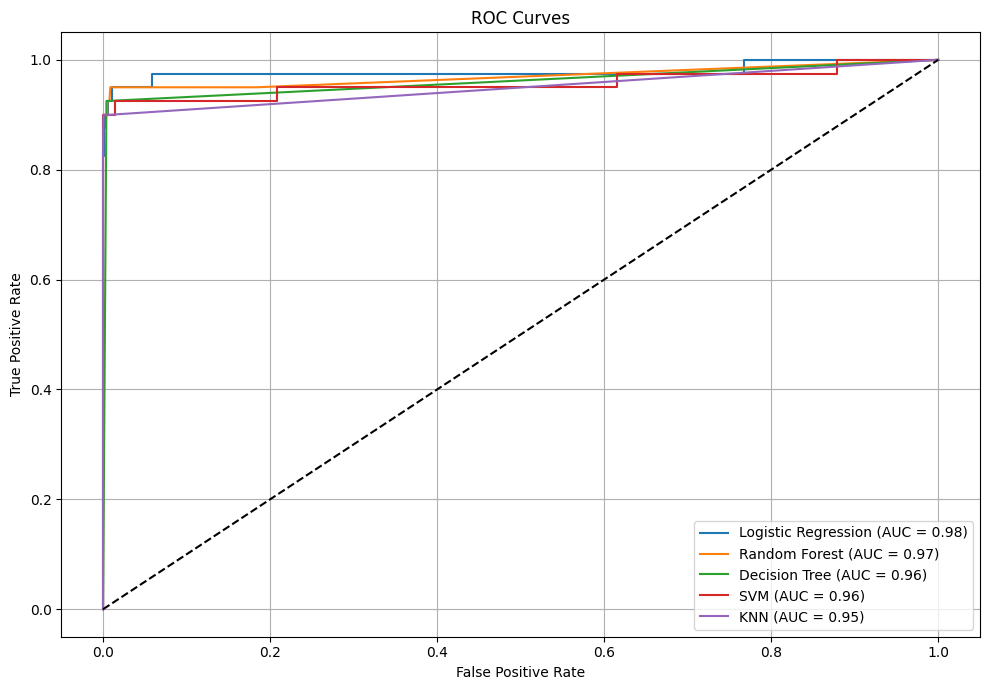

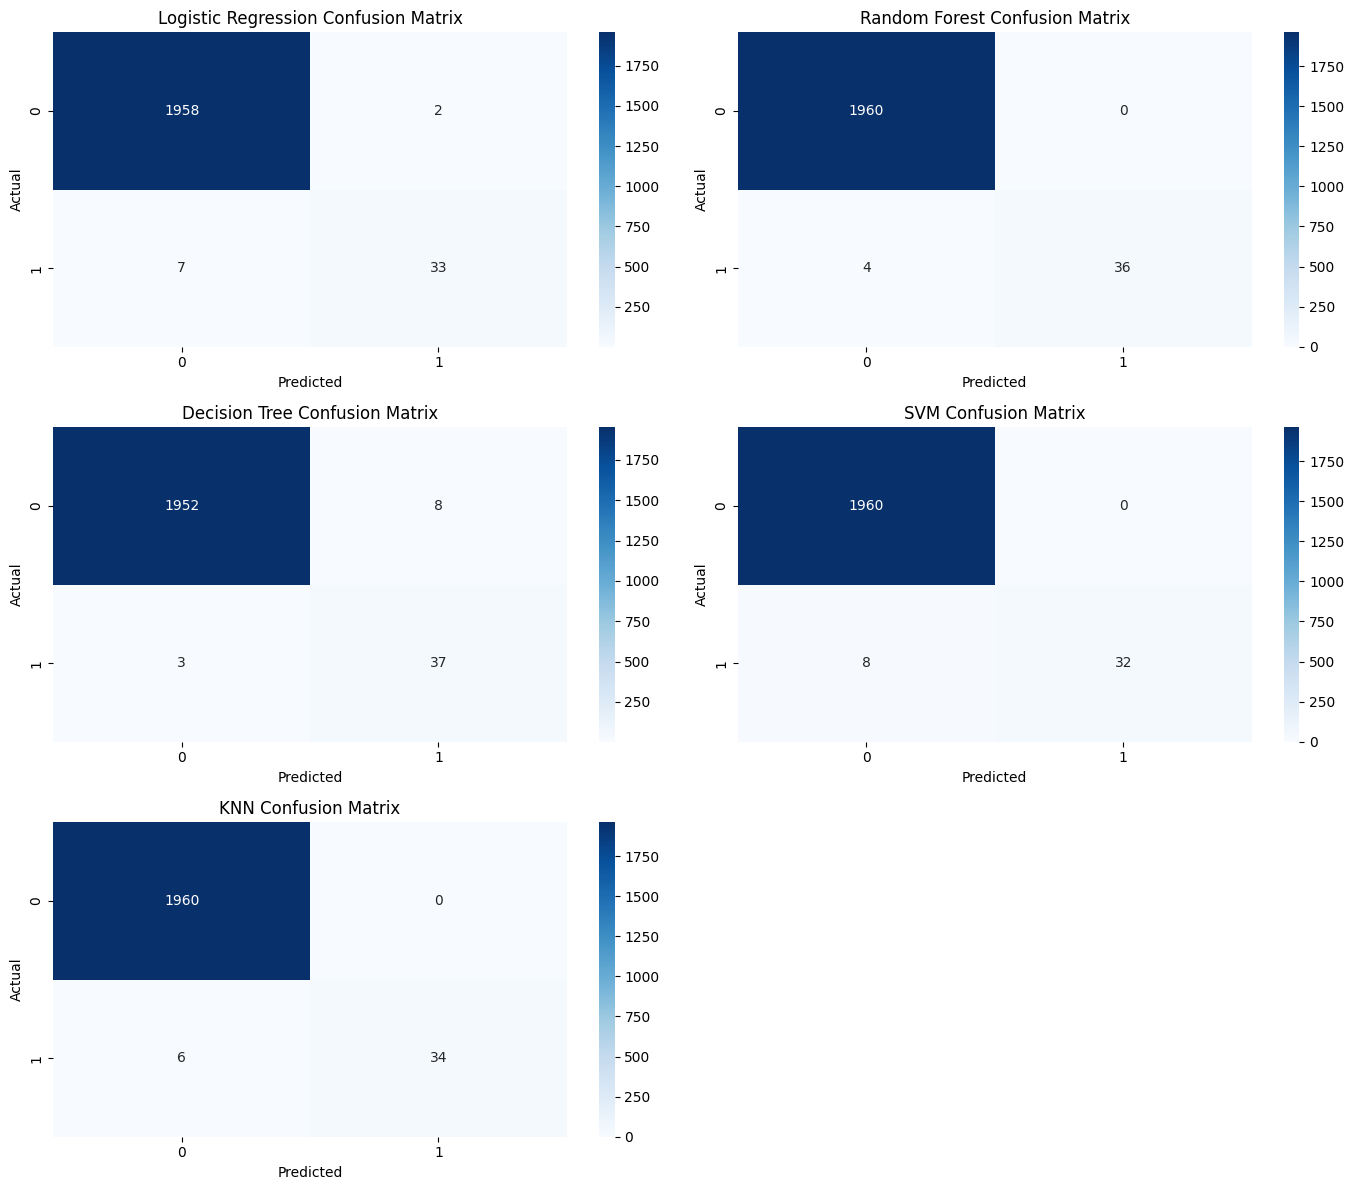

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("/content/creditcard.csv")

# Balanced down-sampling: 200 fraud, 9800 legit → 10,000 total
fraud = df[df['Class'] == 1].sample(n=200, random_state=42)
legit = df[df['Class'] == 0].sample(n=9800, random_state=42)

# Combine and shuffle
df_sample = pd.concat([fraud, legit]).sample(frac=1, random_state=42)

# Features and target
X = df_sample.drop('Class', axis=1)
y = df_sample['Class']

# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Classifier models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Store metrics
results = {}
roc_curves = {}
conf_matrices = {}

# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    }
    conf_matrices[name] = cm
    roc_curves[name] = (fpr, tpr)

# Print metrics
print("MODEL PERFORMANCE:\n")
for name, metrics in results.items():
    print(f"🔹 {name}")
    for metric, value in metrics.items():
        print(f"   {metric:10s}: {value:.4f}")
    print()

# Plot ROC curves
plt.figure(figsize=(10, 7))
for name, (fpr, tpr) in roc_curves.items():
    auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused subplot (if only 5 models)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
